Create spectograms from UrbanSound8k wav files. <br>
SR = 16,000<br>
Mono = True<br>
16bit =?? <br>
<br>
Last run May 18, 2022 at 10pm

In [1]:
from google.colab import drive #Only if you are using Google Drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)
%cd /content/gdrive/My\ Drive/

Mounted at /content/gdrive
Mounted at /content/gdrive
/content/gdrive/My Drive


In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math 

proc_UrbanSound8k_file = '/content/gdrive/MyDrive/urbansound/UrbanSound8K_processed.csv'
us8kf = '/content/gdrive/MyDrive/urbansound/UrbanSound8K.csv'
mycsv = pd.read_csv(us8kf)
df_us8kf = pd.DataFrame(mycsv)

print(df_us8kf.info())
print(df_us8kf.head())

wavf = '/content/gdrive/MyDrive/urbansound/wav/fold'
figf = '/content/gdrive/MyDrive/urbansound/spectograms/protosound/'
df_us8kf['wavfile']=df_us8kf.apply(lambda row: wavf+str(row.fold)+'/'+row.slice_file_name, axis=1)
df_us8kf['figfile']=df_us8kf.apply(lambda row: figf+row.slice_file_name+'.png', axis=1)
df_us8kf['split'] = 'undetermined'
print(df_us8kf.info())

df_us8kf['class'].value_counts()

df_1 = df_us8kf[df_us8kf['class'] == 'dog_bark'].copy()
df_2 = df_us8kf[df_us8kf['class'] == 'children_playing'].copy()
df_3 = df_us8kf[df_us8kf['class'] == 'air_conditioner'].copy()
df_4 = df_us8kf[df_us8kf['class'] == 'street_music'].copy()
df_5 = df_us8kf[df_us8kf['class'] == 'engine_idling'].copy()
df_6 = df_us8kf[df_us8kf['class'] == 'jackhammer'].copy()
df_7 = df_us8kf[df_us8kf['class'] == 'drilling'].copy()
df_8 = df_us8kf[df_us8kf['class'] == 'siren'].copy()
df_9 = df_us8kf[df_us8kf['class'] == 'car_horn'].copy()
df_10 = df_us8kf[df_us8kf['class'] == 'gun_shot'].copy()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB
None
      slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1    

In [ ]:
all=[]
#df_1.shape[0]
trainct = round((df_1.shape[0])* 0.8)
rowct = 0


for row in df_1.itertuples():
    if rowct <= (trainct-1):
        df_1.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_1.at[row.Index, 'split'] = 'test'

##################################
trainct = round((df_2.shape[0])* 0.8)
rowct = 0

for row in df_2.itertuples():
    if rowct <= (trainct-1):
        df_2.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_2.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_3.shape[0])* 0.8)
rowct = 0

for row in df_3.itertuples():
    if rowct <= (trainct-1):
        df_3.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_3.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_4.shape[0])* 0.8)
rowct = 0

for row in df_4.itertuples():
    if rowct <= (trainct-1):
        df_4.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_4.at[row.Index, 'split'] = 'test'

##################################
trainct = round((df_5.shape[0])* 0.8)
rowct = 0

for row in df_5.itertuples():
    if rowct <= (trainct-1):
        df_5.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_5.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_6.shape[0])* 0.8)
rowct = 0

for row in df_6.itertuples():
    if rowct <= (trainct-1):
        df_6.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_6.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_7.shape[0])* 0.8)
rowct = 0

for row in df_7.itertuples():
    if rowct <= (trainct-1):
        df_7.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_7.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_8.shape[0])* 0.8)
rowct = 0

for row in df_8.itertuples():
    if rowct <= (trainct-1):
        df_8.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_8.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_9.shape[0])* 0.8)
rowct = 0

for row in df_9.itertuples():
    if rowct <= (trainct-1):
        df_9.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_9.at[row.Index, 'split'] = 'test'
##################################
trainct = round((df_10.shape[0])* 0.8)
rowct = 0

for row in df_10.itertuples():
    if rowct <= (trainct-1):
        df_10.at[row.Index, "split"] = 'train'
        rowct = rowct+1
    else:
        df_10.at[row.Index, 'split'] = 'test'


In [ ]:
frames = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]
df_all = pd.concat(frames)
df_all.to_csv(proc_UrbanSound8k_file)
#result.to_csv('/Users/gracie/ML/AEA_dataset/UrbanSound8K/df_all.csv')
print(df_all.info())

dfa_1 = df_all.iloc[:500,:]
dfa_2 = df_all.iloc[501:1000,:]
dfa_3 = df_all.iloc[1259:1500,:]
dfa_4 = df_all.iloc[1501:2000,:]
dfa_5 = df_all.iloc[2001:2500,:]
dfa_6 = df_all.iloc[2501:3000,:]
dfa_7 = df_all.iloc[3001:3500,:]
dfa_8 = df_all.iloc[3501:4000,:]
dfa_9 = df_all.iloc[4001:4500,:]
dfa_10 = df_all.iloc[4501:5000,:]
dfa_11 = df_all.iloc[5001:5500,:]
dfa_12 = df_all.iloc[5501:6000,:]
dfa_13 = df_all.iloc[6001:6500,:]
dfa_14 = df_all.iloc[6501:7000,:]
dfa_15 = df_all.iloc[7001:7500,:]
dfa_16 = df_all.iloc[7501:8000,:]
dfa_17 = df_all.iloc[8001:,:]

# function to generate log scaled mel spectograms
srhz=16000
frame_size = int(srhz/1000*960)
frame_shift = int(srhz/1000*25)
fct = 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8732 entries, 0 to 8435
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
 8   wavfile          8732 non-null   object 
 9   figfile          8732 non-null   object 
 10  split            8732 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 818.6+ KB
None


env_mask new in v3

In [ ]:
# Using env_mask from wave form articles
def env_mask(wavf, threshold):
    # Absolute value
    wavf = np.abs(wavf)
    # Point wise mask determination.
    mask = wavf > threshold
    return wavf[mask]

In [ ]:
def generate_melspec(df):
  filect = 0
  rowcount=df.shape[0]
  for i in df.itertuples():
    filect = filect+1
    file = i[9]
    pngfile = figf+i[11]+'/'+i[1]+'.png'
    currpct = round(((filect/rowcount) * 100),2)
    print(str(currpct)+' pct '+'FileCount = '+str(filect)+': Working on spectogram '+pngfile)
    signal, sr = librosa.load(file, sr=16000, mono=True)
    librosa.effects.split(signal, top_db=10, frame_length=1000, hop_length=512)
    # Mask audio to trim out dead noise (simple data cleaning)
    signal = env_mask(signal, 0.005)
    hop_length = 512
    n_fft = 2048
    fmin = 20
    fmax = 8300
    top_db = 80
    n_mels = 64
    hop_length_duration = float(hop_length) / sr
    n_fft_duration = float(n_fft) / sr
    # Mel filter banks
    filter_banks = librosa.filters.mel(n_fft=n_fft, sr=sr, n_mels=64)
    stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
    # This will yield 96-length spectrograms
    spectrogram = np.abs(stft)
    # converted to 64 bin log-scaled Mel spectrogram,
    melspec = librosa.feature.melspectrogram(y=signal, sr=sr, S=spectrogram, n_fft=n_fft, hop_length=hop_length,
                                             win_length=960, window='hann',  n_mels=n_mels, fmin=fmin, fmax=fmax, htk=True)
    #log_mel_spectrogram = librosa.power_to_db(melspec, ref=np.max) top_db=top_db
    log_mel_spectrogram = librosa.power_to_db(melspec, top_db=top_db)
    #plt.figure(figsize=(2.24, 2.24))
    fig = librosa.display.specshow(log_mel_spectrogram, hop_length=hop_length)
    fig2 = plt.gcf()
    plt.axis('off')
    # uncomment the line below to create 224x224 pngs
    fig2.set_size_inches(2.9, 2.91)
    #plt.imshow(cmap='gray_r')
    plt.savefig(pngfile, dpi=100, bbox_inches='tight', pad_inches=0, format='png')


Working on subset from dfa_1
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100032-3-0-0.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100652-3-0-0.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100652-3-0-1.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100652-3-0-2.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100652-3-0-3.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100795-3-0-0.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100795-3-1-0.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gdrive/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=929
  n_fft, y.shape[-1]


35.4 pct FileCount = 177: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/139948-3-1-0.wav.png
35.6 pct FileCount = 178: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/139948-3-2-0.wav.png
35.8 pct FileCount = 179: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/139948-3-4-0.wav.png
36.0 pct FileCount = 180: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/142641-3-0-0.wav.png
36.2 pct FileCount = 181: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/14358-3-0-26.wav.png
36.4 pct FileCount = 182: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/14358-3-0-7.wav.png
36.6 pct FileCount = 183: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/14358-3-0-85.wav.png
36.8 pct FileCount = 184: Working on spectogram /content/gdrive/MyDriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1598
  n_fft, y.shape[-1]


49.4 pct FileCount = 247: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160093-3-0-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1613
  n_fft, y.shape[-1]


49.6 pct FileCount = 248: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160094-3-0-0.wav.png
49.8 pct FileCount = 249: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160366-3-0-13.wav.png
50.0 pct FileCount = 250: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160366-3-0-4.wav.png
50.2 pct FileCount = 251: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160366-3-0-7.wav.png
50.4 pct FileCount = 252: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160366-3-0-8.wav.png
50.6 pct FileCount = 253: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160575-3-0-0.wav.png
50.8 pct FileCount = 254: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160575-3-1-0.wav.png
51.0 pct FileCount = 255: Working on spectogram /content/gdrive/MyDr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=436
  n_fft, y.shape[-1]


53.0 pct FileCount = 265: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/162148-3-0-0.wav.png
53.2 pct FileCount = 266: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/163459-3-0-0.wav.png
53.4 pct FileCount = 267: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164311-3-0-0.wav.png
53.6 pct FileCount = 268: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164311-3-1-0.wav.png
53.8 pct FileCount = 269: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164312-3-0-0.wav.png
54.0 pct FileCount = 270: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164312-3-1-0.wav.png
54.2 pct FileCount = 271: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164312-3-3-0.wav.png
54.4 pct FileCount = 272: Working on spectogram /content/gdrive/MyDri

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1516
  n_fft, y.shape[-1]


97.6 pct FileCount = 488: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203128-3-1-0.wav.png
97.8 pct FileCount = 489: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203128-3-3-0.wav.png
98.0 pct FileCount = 490: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203128-3-6-0.wav.png
98.2 pct FileCount = 491: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203128-3-9-0.wav.png
98.4 pct FileCount = 492: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203355-3-0-0.wav.png
98.6 pct FileCount = 493: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203355-3-1-0.wav.png
98.8 pct FileCount = 494: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203356-3-0-0.wav.png
99.0 pct FileCount = 495: Working on spectogram /content/gdrive/MyDri

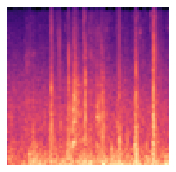

In [ ]:
print('Working on subset from dfa_1')
generate_melspec(dfa_1)


Working on subset from dfa_2
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203516-3-0-0.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/204773-3-7-1.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/204773-3-8-0.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/204773-3-9-0.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/204773-3-9-1.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/204919-3-0-0.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/204919-3-1-0.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gdrive/

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1205
  n_fft, y.shape[-1]


21.84 pct FileCount = 109: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/33849-3-2-0.wav.png
22.04 pct FileCount = 110: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/33849-3-3-0.wav.png
22.24 pct FileCount = 111: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/33849-3-4-0.wav.png
22.44 pct FileCount = 112: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/344-3-0-0.wav.png
22.65 pct FileCount = 113: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/344-3-1-0.wav.png
22.85 pct FileCount = 114: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/344-3-4-0.wav.png
23.05 pct FileCount = 115: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/344-3-5-0.wav.png
23.25 pct FileCount = 116: Working on spectogram /content/gdrive/MyDrive/urba

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1960
  n_fft, y.shape[-1]


86.17 pct FileCount = 430: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/81722-3-0-26.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1516
  n_fft, y.shape[-1]


86.37 pct FileCount = 431: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/81722-3-0-28.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1462
  n_fft, y.shape[-1]


86.57 pct FileCount = 432: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/81791-3-0-0.wav.png
86.77 pct FileCount = 433: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/81791-3-0-1.wav.png
86.97 pct FileCount = 434: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/81791-3-1-0.wav.png
87.17 pct FileCount = 435: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/81799-3-0-0.wav.png
87.37 pct FileCount = 436: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/81799-3-0-1.wav.png
87.58 pct FileCount = 437: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/81799-3-1-0.wav.png
87.78 pct FileCount = 438: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/81799-3-1-2.wav.png
87.98 pct FileCount = 439: Working on spectogram /content/gdrive/MyDrive/urb

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1415
  n_fft, y.shape[-1]


96.39 pct FileCount = 481: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/95404-3-0-1.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1228
  n_fft, y.shape[-1]


96.59 pct FileCount = 482: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/95404-3-0-4.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=286
  n_fft, y.shape[-1]


96.79 pct FileCount = 483: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/95404-3-0-5.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=339
  n_fft, y.shape[-1]


96.99 pct FileCount = 484: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/95532-3-0-0.wav.png
97.19 pct FileCount = 485: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/95536-3-0-1.wav.png
97.39 pct FileCount = 486: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/95536-3-0-2.wav.png
97.6 pct FileCount = 487: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/95536-3-0-4.wav.png
97.8 pct FileCount = 488: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/95536-3-0-5.wav.png
98.0 pct FileCount = 489: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/95549-3-0-14.wav.png
98.2 pct FileCount = 490: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/95549-3-0-20.wav.png
98.4 pct FileCount = 491: Working on spectogram /content/gdrive/MyDrive/urbans

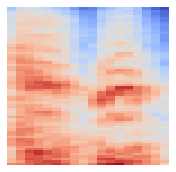

In [ ]:
print('Working on subset from dfa_2')
generate_melspec(dfa_2)

Working on subset from dfa_3
0.41 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160009-2-0-30.wav.png
0.83 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160009-2-0-31.wav.png
1.24 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160009-2-0-47.wav.png
1.66 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160009-2-0-5.wav.png
2.07 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160009-2-0-50.wav.png
2.49 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160010-2-0-19.wav.png
2.9 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/160010-2-0-21.wav.png
3.32 pct FileCount = 8: Working on spectogram /co

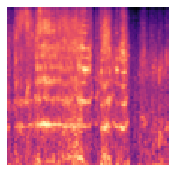

In [ ]:
print('Working on subset from dfa_3')
generate_melspec(dfa_3)

#27.05 pct FileCount = 135: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/137971-2-0-6.wav.png
#27.25 pct FileCount = 136: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/137971-2-0-8.wav.png
#27.45 pct FileCount = 137: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/138031-2-0-13.wav.png
#/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=0
#  n_fft, y.shape[-1]


Working on subset from dfa_4
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/184449-2-0-33.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/185909-2-0-102.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/185909-2-0-116.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/185909-2-0-13.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/185909-2-0-17.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/185909-2-0-22.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/185909-2-0-34.wav.png
1.6 pct FileCount = 8: Working on spectogram /conten

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=9
  n_fft, y.shape[-1]


5.41 pct FileCount = 27: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188497-2-0-1.wav.png
5.61 pct FileCount = 28: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188497-2-0-11.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1296
  n_fft, y.shape[-1]


5.81 pct FileCount = 29: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188497-2-0-17.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=128
  n_fft, y.shape[-1]


6.01 pct FileCount = 30: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188497-2-0-19.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=290
  n_fft, y.shape[-1]


6.21 pct FileCount = 31: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188497-2-0-2.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=13
  n_fft, y.shape[-1]


6.41 pct FileCount = 32: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188497-2-0-23.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=38
  n_fft, y.shape[-1]


6.61 pct FileCount = 33: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188497-2-0-8.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=34
  n_fft, y.shape[-1]


6.81 pct FileCount = 34: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/190893-2-0-10.wav.png
7.01 pct FileCount = 35: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/190893-2-0-11.wav.png
7.21 pct FileCount = 36: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/190893-2-0-12.wav.png
7.41 pct FileCount = 37: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/190893-2-0-21.wav.png
7.62 pct FileCount = 38: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/190893-2-0-23.wav.png
7.82 pct FileCount = 39: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/190893-2-0-27.wav.png
8.02 pct FileCount = 40: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/190893-2-0-28.wav.png
8.22 pct FileCount = 41: Working on spectogram /content/gdrive/MyDriv

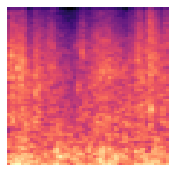

In [ ]:
print('Working on subset from dfa_4')
generate_melspec(dfa_4)

Working on subset from dfa_5
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100852-0-0-1.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100852-0-0-10.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100852-0-0-11.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100852-0-0-12.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100852-0-0-13.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100852-0-0-14.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/100852-0-0-15.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=121
  n_fft, y.shape[-1]


57.31 pct FileCount = 286: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/159761-0-0-1.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=96
  n_fft, y.shape[-1]


57.52 pct FileCount = 287: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/159761-0-0-2.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=84
  n_fft, y.shape[-1]


57.72 pct FileCount = 288: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/159761-0-0-3.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=81
  n_fft, y.shape[-1]


57.92 pct FileCount = 289: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/159761-0-0-4.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=68
  n_fft, y.shape[-1]


58.12 pct FileCount = 290: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/159761-0-0-5.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=61
  n_fft, y.shape[-1]


58.32 pct FileCount = 291: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/159761-0-0-6.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=48
  n_fft, y.shape[-1]


58.52 pct FileCount = 292: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/159761-0-0-7.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=42
  n_fft, y.shape[-1]


58.72 pct FileCount = 293: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/159761-0-0-8.wav.png
58.92 pct FileCount = 294: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/162103-0-0-0.wav.png
59.12 pct FileCount = 295: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/162103-0-0-1.wav.png
59.32 pct FileCount = 296: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/162103-0-0-10.wav.png
59.52 pct FileCount = 297: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/162103-0-0-11.wav.png
59.72 pct FileCount = 298: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/162103-0-0-12.wav.png
59.92 pct FileCount = 299: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/162103-0-0-13.wav.png
60.12 pct FileCount = 300: Working on spectogram /content/

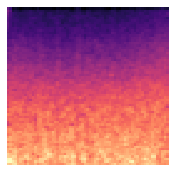

In [ ]:
print('Working on subset from dfa_5')
generate_melspec(dfa_5)

Working on subset from dfa_6
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178686-0-0-44.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178686-0-0-45.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178686-0-0-46.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178686-0-0-53.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178686-0-0-55.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178686-0-0-57.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178686-0-0-6.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1433
  n_fft, y.shape[-1]


4.81 pct FileCount = 24: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/184805-0-0-13.wav.png
5.01 pct FileCount = 25: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/184805-0-0-16.wav.png
5.21 pct FileCount = 26: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/184805-0-0-2.wav.png
5.41 pct FileCount = 27: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/184805-0-0-27.wav.png
5.61 pct FileCount = 28: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/184805-0-0-32.wav.png
5.81 pct FileCount = 29: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/184805-0-0-34.wav.png
6.01 pct FileCount = 30: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/184805-0-0-4.wav.png
6.21 pct FileCount = 31: Working on spectogram /content/gdrive/MyDrive/

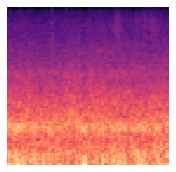

In [ ]:
print('Working on subset from dfa_6')
generate_melspec(dfa_6)

Working on subset from dfa_7
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/101848-9-0-1.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/101848-9-0-2.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/101848-9-0-3.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/101848-9-0-8.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/101848-9-0-9.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/105425-9-0-1.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/105425-9-0-10.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gdrive

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=950
  n_fft, y.shape[-1]


89.98 pct FileCount = 449: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/180057-9-0-20.wav.png
90.18 pct FileCount = 450: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/180057-9-0-34.wav.png
90.38 pct FileCount = 451: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/180057-9-0-36.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1275
  n_fft, y.shape[-1]


90.58 pct FileCount = 452: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/180057-9-0-5.wav.png
90.78 pct FileCount = 453: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/180057-9-0-7.wav.png
90.98 pct FileCount = 454: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/181102-9-0-111.wav.png
91.18 pct FileCount = 455: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/181102-9-0-117.wav.png
91.38 pct FileCount = 456: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/181102-9-0-23.wav.png
91.58 pct FileCount = 457: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/181102-9-0-26.wav.png
91.78 pct FileCount = 458: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/181102-9-0-50.wav.png
91.98 pct FileCount = 459: Working on spectogram /conte

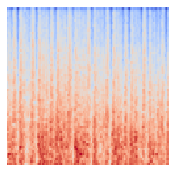

In [ ]:
print('Working on subset from dfa_7')
generate_melspec(dfa_7)

Working on subset from dfa_8
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/189825-9-0-7.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/191431-9-0-26.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/191431-9-0-30.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/191431-9-0-61.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/191431-9-0-66.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/191431-9-0-73.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/191431-9-0-8.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gd

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=385
  n_fft, y.shape[-1]


27.66 pct FileCount = 138: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39967-9-0-100.wav.png
27.86 pct FileCount = 139: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39967-9-0-44.wav.png
28.06 pct FileCount = 140: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39967-9-0-56.wav.png
28.26 pct FileCount = 141: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39967-9-0-78.wav.png
28.46 pct FileCount = 142: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39967-9-0-99.wav.png
28.66 pct FileCount = 143: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39968-9-0-144.wav.png
28.86 pct FileCount = 144: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39968-9-0-173.wav.png
29.06 pct FileCount = 145: Working on spectogram /content/g

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=751
  n_fft, y.shape[-1]


29.66 pct FileCount = 148: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39968-9-0-81.wav.png
29.86 pct FileCount = 149: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39970-9-0-108.wav.png
30.06 pct FileCount = 150: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39970-9-0-142.wav.png
30.26 pct FileCount = 151: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39970-9-0-41.wav.png
30.46 pct FileCount = 152: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39970-9-0-46.wav.png
30.66 pct FileCount = 153: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39970-9-0-54.wav.png
30.86 pct FileCount = 154: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/39970-9-0-98.wav.png
31.06 pct FileCount = 155: Working on spectogram /content/gd

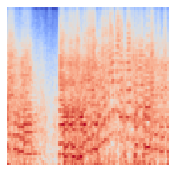

In [ ]:
print('Working on subset from dfa_8')
generate_melspec(dfa_8)

Working on subset from dfa_9
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102857-5-0-1.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102857-5-0-10.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102857-5-0-11.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102857-5-0-12.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102857-5-0-13.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102857-5-0-14.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102857-5-0-15.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/g

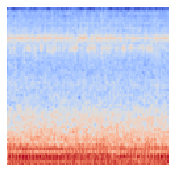

In [ ]:
print('Working on subset from dfa_9')
generate_melspec(dfa_9)

Working on subset from dfa_10
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/17578-5-0-16.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/17578-5-0-18.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/17578-5-0-2.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/17578-5-0-21.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/17578-5-0-22.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/17578-5-0-23.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/17578-5-0-24.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gdrive/

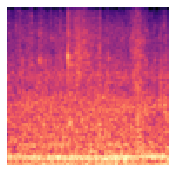

In [ ]:
print('Working on subset from dfa_10')
generate_melspec(dfa_10)

Working on subset from dfa_11
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103074-7-0-1.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103074-7-0-2.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103074-7-1-0.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103074-7-1-1.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103074-7-1-2.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103074-7-1-3.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103074-7-1-4.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gdrive

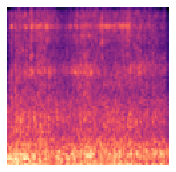

In [ ]:
print('Working on subset from dfa_11')
generate_melspec(dfa_11)

Working on subset from dfa_12
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178261-7-3-0.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178261-7-3-1.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178261-7-3-2.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178261-7-3-3.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178261-7-3-4.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178261-7-3-5.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/178261-7-3-6.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gdrive

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1586
  n_fft, y.shape[-1]


26.85 pct FileCount = 134: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188824-7-4-0.wav.png
27.05 pct FileCount = 135: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188824-7-5-0.wav.png
27.25 pct FileCount = 136: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188824-7-6-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1958
  n_fft, y.shape[-1]


27.45 pct FileCount = 137: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188824-7-7-0.wav.png
27.66 pct FileCount = 138: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188824-7-8-0.wav.png
27.86 pct FileCount = 139: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/188824-7-9-0.wav.png
28.06 pct FileCount = 140: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203929-7-1-0.wav.png
28.26 pct FileCount = 141: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203929-7-1-1.wav.png
28.46 pct FileCount = 142: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203929-7-1-2.wav.png
28.66 pct FileCount = 143: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/203929-7-1-3.wav.png
28.86 pct FileCount = 144: Working on spectogram /content/gdri

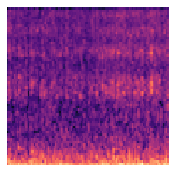

In [ ]:
print('Working on subset from dfa_12')
generate_melspec(dfa_12)

Working on subset from dfa_13
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103199-4-0-3.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103199-4-0-4.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103199-4-0-5.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103199-4-0-6.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103199-4-1-0.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103199-4-2-0.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/103199-4-2-1.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gdrive

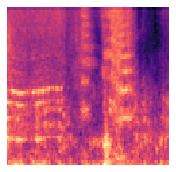

In [ ]:
print('Working on subset from dfa_13')
generate_melspec(dfa_13)

Working on subset from dfa_14
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/187863-4-0-3.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/187863-4-0-4.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/187863-4-0-5.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/19007-4-0-0.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/195063-4-0-0.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/195063-4-1-0.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/199929-4-0-0.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gdrive/

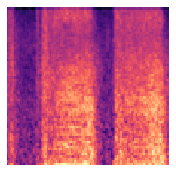

In [ ]:
print('Working on subset from dfa_14')
generate_melspec(dfa_14)

Working on subset from dfa_15
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102853-8-0-1.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102853-8-0-2.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102853-8-0-3.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102853-8-0-4.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102853-8-0-5.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102853-8-0-6.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/102853-8-1-0.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gdrive

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=659
  n_fft, y.shape[-1]


39.88 pct FileCount = 199: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-11.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=637
  n_fft, y.shape[-1]


40.08 pct FileCount = 200: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-12.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=582
  n_fft, y.shape[-1]


40.28 pct FileCount = 201: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-13.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=788
  n_fft, y.shape[-1]


40.48 pct FileCount = 202: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-14.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=756
  n_fft, y.shape[-1]


40.68 pct FileCount = 203: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-15.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=885
  n_fft, y.shape[-1]


40.88 pct FileCount = 204: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-16.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=429
  n_fft, y.shape[-1]


41.08 pct FileCount = 205: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-17.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=300
  n_fft, y.shape[-1]


41.28 pct FileCount = 206: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-18.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=410
  n_fft, y.shape[-1]


41.48 pct FileCount = 207: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-2.wav.png
41.68 pct FileCount = 208: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-3.wav.png
41.88 pct FileCount = 209: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-4.wav.png
42.08 pct FileCount = 210: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-5.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=523
  n_fft, y.shape[-1]


42.28 pct FileCount = 211: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-6.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=996
  n_fft, y.shape[-1]


42.48 pct FileCount = 212: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-7.wav.png
42.69 pct FileCount = 213: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-8.wav.png
42.89 pct FileCount = 214: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/148632-8-0-9.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=293
  n_fft, y.shape[-1]


43.09 pct FileCount = 215: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/156868-8-0-0.wav.png
43.29 pct FileCount = 216: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/156868-8-1-0.wav.png
43.49 pct FileCount = 217: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/156868-8-2-0.wav.png
43.69 pct FileCount = 218: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/156868-8-3-0.wav.png
43.89 pct FileCount = 219: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/156868-8-4-0.wav.png
44.09 pct FileCount = 220: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/156869-8-0-0.wav.png
44.29 pct FileCount = 221: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/156869-8-0-1.wav.png
44.49 pct FileCount = 222: Working on spectogram /content/gdri

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=0
  n_fft, y.shape[-1]


ValueError: ignored

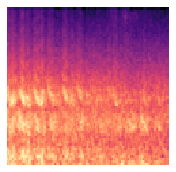

In [ ]:
print('Working on subset from dfa_15')
generate_melspec(dfa_15)

Working on subset from dfa_16
0.2 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164053-8-3-0.wav.png
0.4 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164782-8-0-0.wav.png
0.6 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164782-8-0-1.wav.png
0.8 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164782-8-0-2.wav.png
1.0 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164782-8-0-3.wav.png
1.2 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164782-8-0-4.wav.png
1.4 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164782-8-0-5.wav.png
1.6 pct FileCount = 8: Working on spectogram /content/gdrive

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=875
  n_fft, y.shape[-1]


42.89 pct FileCount = 214: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/34952-8-0-3.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=45
  n_fft, y.shape[-1]


43.09 pct FileCount = 215: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/34952-8-0-4.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=41
  n_fft, y.shape[-1]


43.29 pct FileCount = 216: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/34952-8-0-5.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=97
  n_fft, y.shape[-1]


43.49 pct FileCount = 217: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/34952-8-0-6.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=113
  n_fft, y.shape[-1]


43.69 pct FileCount = 218: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/34952-8-0-7.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=135
  n_fft, y.shape[-1]


43.89 pct FileCount = 219: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/40717-8-0-0.wav.png
44.09 pct FileCount = 220: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/40717-8-0-1.wav.png
44.29 pct FileCount = 221: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/40717-8-0-2.wav.png
44.49 pct FileCount = 222: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/40717-8-0-3.wav.png
44.69 pct FileCount = 223: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/40717-8-0-4.wav.png
44.89 pct FileCount = 224: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/40717-8-0-5.wav.png
45.09 pct FileCount = 225: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/40717-8-0-6.wav.png
45.29 pct FileCount = 226: Working on spectogram /content/gdrive/MyDr

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=638
  n_fft, y.shape[-1]


58.92 pct FileCount = 294: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/71177-8-0-1.wav.png
59.12 pct FileCount = 295: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/71177-8-1-0.wav.png
59.32 pct FileCount = 296: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/71177-8-1-1.wav.png
59.52 pct FileCount = 297: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/71177-8-1-2.wav.png
59.72 pct FileCount = 298: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/71177-8-1-3.wav.png
59.92 pct FileCount = 299: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/71177-8-1-4.wav.png
60.12 pct FileCount = 300: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/71177-8-2-0.wav.png
60.32 pct FileCount = 301: Working on spectogram /content/gdrive/MyDrive/urb

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1677
  n_fft, y.shape[-1]


71.34 pct FileCount = 356: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/75490-8-0-0.wav.png
71.54 pct FileCount = 357: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/75490-8-0-1.wav.png
71.74 pct FileCount = 358: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/75490-8-0-2.wav.png
71.94 pct FileCount = 359: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/75490-8-1-0.wav.png
72.14 pct FileCount = 360: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/75490-8-1-1.wav.png
72.34 pct FileCount = 361: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/88121-8-0-0.wav.png
72.55 pct FileCount = 362: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/88121-8-0-1.wav.png
72.75 pct FileCount = 363: Working on spectogram /content/gdrive/MyDrive/urb

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1463
  n_fft, y.shape[-1]


91.38 pct FileCount = 456: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/132073-1-1-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1561
  n_fft, y.shape[-1]


91.58 pct FileCount = 457: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/132073-1-2-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=408
  n_fft, y.shape[-1]


91.78 pct FileCount = 458: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/132073-1-3-0.wav.png
91.98 pct FileCount = 459: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/132073-1-4-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=418
  n_fft, y.shape[-1]


92.18 pct FileCount = 460: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/132073-1-5-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2045
  n_fft, y.shape[-1]


92.38 pct FileCount = 461: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/132073-1-6-0.wav.png
92.59 pct FileCount = 462: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/138465-1-0-0.wav.png
92.79 pct FileCount = 463: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/138468-1-0-0.wav.png
92.99 pct FileCount = 464: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/143115-1-0-0.wav.png
93.19 pct FileCount = 465: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/143115-1-1-0.wav.png
93.39 pct FileCount = 466: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/143115-1-2-0.wav.png
93.59 pct FileCount = 467: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/143115-1-3-0.wav.png
93.79 pct FileCount = 468: Working on spectogram /content/gdri

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=131
  n_fft, y.shape[-1]


94.19 pct FileCount = 470: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/145577-1-0-0.wav.png
94.39 pct FileCount = 471: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/151359-1-0-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1302
  n_fft, y.shape[-1]


94.59 pct FileCount = 472: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/151359-1-1-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1566
  n_fft, y.shape[-1]


94.79 pct FileCount = 473: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/151359-1-2-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1267
  n_fft, y.shape[-1]


94.99 pct FileCount = 474: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/151359-1-3-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1358
  n_fft, y.shape[-1]


95.19 pct FileCount = 475: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/153057-1-0-0.wav.png
95.39 pct FileCount = 476: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/155129-1-0-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1094
  n_fft, y.shape[-1]


95.59 pct FileCount = 477: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/155129-1-1-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1616
  n_fft, y.shape[-1]


95.79 pct FileCount = 478: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/155129-1-2-0.wav.png
95.99 pct FileCount = 479: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/155130-1-0-0.wav.png
96.19 pct FileCount = 480: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/155130-1-1-0.wav.png
96.39 pct FileCount = 481: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/155234-1-0-0.wav.png
96.59 pct FileCount = 482: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/155283-1-0-0.wav.png
96.79 pct FileCount = 483: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/155283-1-1-0.wav.png
96.99 pct FileCount = 484: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/156091-1-0-0.wav.png
97.19 pct FileCount = 485: Working on spectogram /content/gdri

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1643
  n_fft, y.shape[-1]


99.6 pct FileCount = 497: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/162702-1-1-0.wav.png
99.8 pct FileCount = 498: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/162703-1-0-0.wav.png
100.0 pct FileCount = 499: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/162728-1-0-0.wav.png


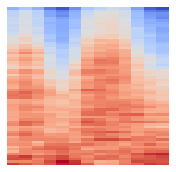

In [ ]:
print('Working on subset from dfa_16')
generate_melspec(dfa_16)

Working on subset from dfa_17
0.14 pct FileCount = 1: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164626-1-0-0.wav.png
0.27 pct FileCount = 2: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/164627-1-0-0.wav.png
0.41 pct FileCount = 3: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/170243-1-0-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1430
  n_fft, y.shape[-1]


0.55 pct FileCount = 4: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/17074-1-0-0.wav.png
0.68 pct FileCount = 5: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/17124-1-0-0.wav.png
0.82 pct FileCount = 6: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/171249-1-0-0.wav.png
0.96 pct FileCount = 7: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/171249-1-1-0.wav.png
1.09 pct FileCount = 8: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/171249-1-2-0.wav.png
1.23 pct FileCount = 9: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/17307-1-0-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=914
  n_fft, y.shape[-1]


1.37 pct FileCount = 10: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174840-1-0-0.wav.png
1.5 pct FileCount = 11: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174841-1-0-0.wav.png
1.64 pct FileCount = 12: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/175842-1-0-0.wav.png
1.78 pct FileCount = 13: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/175843-1-0-0.wav.png
1.92 pct FileCount = 14: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/175844-1-0-0.wav.png
2.05 pct FileCount = 15: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/175845-1-0-0.wav.png
2.19 pct FileCount = 16: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/175846-1-0-0.wav.png
2.33 pct FileCount = 17: Working on spectogram /content/gdrive/MyDrive/urbans

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=785
  n_fft, y.shape[-1]


45.96 pct FileCount = 336: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/87275-1-2-0.wav.png
46.1 pct FileCount = 337: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/87275-1-3-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=938
  n_fft, y.shape[-1]


46.24 pct FileCount = 338: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/87275-1-4-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1071
  n_fft, y.shape[-1]


46.37 pct FileCount = 339: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/87275-1-5-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1697
  n_fft, y.shape[-1]


46.51 pct FileCount = 340: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/89679-1-0-0.wav.png
46.65 pct FileCount = 341: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/89679-1-1-0.wav.png
46.79 pct FileCount = 342: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/94401-1-0-0.wav.png
46.92 pct FileCount = 343: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/94868-1-0-0.wav.png
47.06 pct FileCount = 344: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/94868-1-1-0.wav.png
47.2 pct FileCount = 345: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/94868-1-2-0.wav.png
47.33 pct FileCount = 346: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/9674-1-0-0.wav.png
47.47 pct FileCount = 347: Working on spectogram /content/gdrive/MyDrive/urban

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1738
  n_fft, y.shape[-1]


83.31 pct FileCount = 609: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174289-6-1-0.wav.png
83.45 pct FileCount = 610: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174289-6-2-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1654
  n_fft, y.shape[-1]


83.58 pct FileCount = 611: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174289-6-3-0.wav.png


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=861
  n_fft, y.shape[-1]


83.72 pct FileCount = 612: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174290-6-0-0.wav.png
83.86 pct FileCount = 613: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174290-6-1-0.wav.png
83.99 pct FileCount = 614: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174290-6-2-0.wav.png
84.13 pct FileCount = 615: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174290-6-3-0.wav.png
84.27 pct FileCount = 616: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174292-6-0-0.wav.png
84.4 pct FileCount = 617: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174292-6-1-0.wav.png
84.54 pct FileCount = 618: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/174292-6-2-0.wav.png
84.68 pct FileCount = 619: Working on spectogram /content/gdriv

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=698
  n_fft, y.shape[-1]


86.05 pct FileCount = 629: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197318-6-1-0.wav.png
86.18 pct FileCount = 630: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197318-6-10-0.wav.png
86.32 pct FileCount = 631: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197318-6-11-0.wav.png
86.46 pct FileCount = 632: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197318-6-12-0.wav.png
86.59 pct FileCount = 633: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197318-6-2-0.wav.png
86.73 pct FileCount = 634: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197318-6-3-0.wav.png
86.87 pct FileCount = 635: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197318-6-4-0.wav.png
87.0 pct FileCount = 636: Working on spectogram /content/gd

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1114
  n_fft, y.shape[-1]


87.55 pct FileCount = 640: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197318-6-9-0.wav.png
87.69 pct FileCount = 641: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197320-6-0-0.wav.png
87.82 pct FileCount = 642: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197320-6-1-0.wav.png
87.96 pct FileCount = 643: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197320-6-10-0.wav.png
88.1 pct FileCount = 644: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197320-6-11-0.wav.png
88.24 pct FileCount = 645: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197320-6-12-0.wav.png
88.37 pct FileCount = 646: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/197320-6-2-0.wav.png
88.51 pct FileCount = 647: Working on spectogram /content/gd

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=2008
  n_fft, y.shape[-1]


98.5 pct FileCount = 720: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/76091-6-5-0.wav.png
98.63 pct FileCount = 721: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/76093-6-0-0.wav.png
98.77 pct FileCount = 722: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/76093-6-1-0.wav.png
98.91 pct FileCount = 723: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/76094-6-0-0.wav.png
99.04 pct FileCount = 724: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/76094-6-1-0.wav.png
99.18 pct FileCount = 725: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/77246-6-0-0.wav.png
99.32 pct FileCount = 726: Working on spectogram /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/77247-6-0-0.wav.png
99.45 pct FileCount = 727: Working on spectogram /content/gdrive/MyDrive/urba

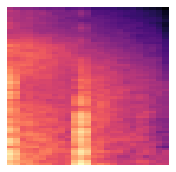

In [ ]:
print('Working on subset from dfa_17')
generate_melspec(dfa_17)

Create a backup of the spectograms

In [2]:
! cp /content/gdrive/MyDrive/urbansound/spectograms/protosound/train/*.* /content/gdrive/MyDrive/urbansound/spectograms/protosound/all_backup

In [3]:
! cp /content/gdrive/MyDrive/urbansound/spectograms/protosound/test/*.* /content/gdrive/MyDrive/urbansound/spectograms/protosound/all_backup

In [2]:
! ! cp -R /content/gdrive/MyDrive/urbansound/spectograms/protosound/dataset/train/* /content/gdrive/MyDrive/urbansound/spectograms/protosound/all_labels

In [3]:
! cp -R /content/gdrive/MyDrive/urbansound/spectograms/protosound/dataset/test/* /content/gdrive/MyDrive/urbansound/spectograms/protosound/all_labels